# Data Scientist Challenge - LATAM Airlines

### Richard Fernández

### OBJETIVO

Predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de Chile.

### COMPRENSIÓN DE LOS DATOS

In [298]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
import datetime
from scipy.stats import chi2_contingency
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [82]:
#LECTURA DE DATOS
data = pd.read_csv('D:/Bases/Latam/dataset_SCL.csv')

C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [84]:
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [85]:
#DIMENSIÓN DE LOS DATOS
data.shape

(68206, 18)

In [86]:
#DESCRIPCIÓN DE LOS DATOS
data.dtypes

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

In [87]:
#Las variables Fecha-I y Fecha-O están como object
#se cambiarán a un formato de fecha

#data['Fecha-I'] = data['Fecha-I'].astype('datetime64[s]')
#data['Fecha-O'] = data['Fecha-O'].astype('datetime64[s]')

data['Fecha-I'] = pd.to_datetime(data['Fecha-I'])
data['Fecha-O'] = pd.to_datetime(data['Fecha-O'])

In [88]:
data.dtypes

Fecha-I      datetime64[ns]
Vlo-I                object
Ori-I                object
Des-I                object
Emp-I                object
Fecha-O      datetime64[ns]
Vlo-O                object
Ori-O                object
Des-O                object
Emp-O                object
DIA                   int64
MES                   int64
AÑO                   int64
DIANOM               object
TIPOVUELO            object
OPERA                object
SIGLAORI             object
SIGLADES             object
dtype: object

In [89]:
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [90]:
#IDENTIFICACIÓN DE VALORES FALTANTES
data.isnull().sum(axis = 0)

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [91]:
na_ratio = ((data.isnull().sum() / len(data))*100)
print(na_ratio)

Fecha-I      0.000000
Vlo-I        0.000000
Ori-I        0.000000
Des-I        0.000000
Emp-I        0.000000
Fecha-O      0.000000
Vlo-O        0.001466
Ori-O        0.000000
Des-O        0.000000
Emp-O        0.000000
DIA          0.000000
MES          0.000000
AÑO          0.000000
DIANOM       0.000000
TIPOVUELO    0.000000
OPERA        0.000000
SIGLAORI     0.000000
SIGLADES     0.000000
dtype: float64


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

La única variable que tiene valores faltantes es la "Vlo-O", esta variable sólo tiene 1 valor faltante y representa el 0.1466% de la base.

In [93]:
data[pd.isnull(data['Vlo-O'])]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


In [94]:
100*((data['Vlo-O'].isnull().sum() / len(data['Vlo-O']))*100)

0.1466146673313198

In [95]:
#Se completará con el mismo valor de la variable "Vlo-I"
data['Vlo-O'] = data['Vlo-O'].fillna(200)

In [96]:
#Ya no se tienen valores faltantes
100*((data['Vlo-O'].isnull().sum() / len(data['Vlo-O']))*100)

0.0

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68206 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

# DESAFÍO

# Pregunta 1
¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

La pregunta 1 se responderá despues de la pregunta 3, pues en ese momento se tienen variables adicionales generadas.

# Pregunta 2
Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
○ temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
○ dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
○ atraso_15 : 1 si dif_min > 15, 0 si no.
○ periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .


### temporada_alta

In [ ]:
#La variable "Fecha-I" sólo tiene información del año 2017

In [98]:
data['Fecha-I'].min()

Timestamp('2017-01-01 00:15:00')

In [99]:
data['Fecha-I'].max()

Timestamp('2017-12-31 23:55:00')

In [ ]:
# Se procede a crear la variable temporada_alta

In [111]:
#Lista de condiciones
cond_1 = [
    (data['Fecha-I'] >= '2017-01-01 00:00:00') & (data['Fecha-I'] <= '2017-03-03 23:59:00'), #15-Dic y 3-Mar    
    (data['Fecha-I'] >= '2017-07-15 00:00:00') & (data['Fecha-I'] <= '2017-07-31 23:59:00'), #15-Jul y 31-Jul
    (data['Fecha-I'] >= '2017-09-11 00:00:00') & (data['Fecha-I'] <= '2017-09-30 23:59:00'), #11-Sep y 30-Sep
    (data['Fecha-I'] >= '2017-12-15 00:00:00') & (data['Fecha-I'] <= '2017-12-31 23:59:00') #15-Dic y 3-Mar
    ]

#Lista de valores para cada condición
val_1 = ['1', '1', '1', '1']

#Creación de la variable temporada_alta
data['temporada_alta'] = np.select(cond_1, val_1)

In [112]:
data['temporada_alta'].value_counts()

0    45444
1    22762
Name: temporada_alta, dtype: int64

In [113]:
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1


### dif_min

In [144]:
data['dif_min'] = pd.to_numeric(data['Fecha-O']-data['Fecha-I'])/60000000000

In [147]:
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami,1,34.0
6,2017-01-07 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 23:25:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami,1,-5.0
7,2017-01-08 23:30:00,226,SCEL,KMIA,AAL,2017-01-08 23:25:00,226,SCEL,KMIA,AAL,8,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,-5.0


### atraso_15

In [151]:
data['atraso_15'] = np.where(data['dif_min'] > 15, 1, 0)
data['atraso_15'].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

In [152]:
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0


### periodo_dia

In [192]:
data['hora'] = data['Fecha-I'].dt.hour
data['hora'].value_counts()

7     4882
8     4363
6     4199
18    4162
15    3884
14    3836
13    3675
11    3668
19    3591
17    3465
12    3412
9     3264
16    3072
20    2935
5     2514
10    2462
22    2320
21    2312
1     1573
23    1297
4     1092
0     1082
2      641
3      505
Name: hora, dtype: int64

In [193]:
#Lista de condiciones
cond_4 = [
    (data['hora'] >= 0) & (data['hora'] < 5), #noche
    (data['hora'] >= 5) & (data['hora'] < 12), #mañana
    (data['hora'] >= 12) & (data['hora'] < 19), #tarde
    (data['hora'] >= 19) #noche
    ]

#Lista de valores para cada condición
val_4 = ['noche', 'mañana', 'tarde', 'noche']

#Creación de la variable periodo_dia
data['periodo_dia'] = np.select(cond_4, val_4)

#Eliminación de la variable hora
data = data.drop(['hora'],axis=1)

In [196]:
data['periodo_dia'].value_counts()

tarde     25506
mañana    25352
noche     17348
Name: periodo_dia, dtype: int64

In [197]:
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0,noche


In [199]:
synthetic_features = data.loc[:,['temporada_alta','dif_min','atraso_15','periodo_dia']]
synthetic_features.head()

,temporada_alta,dif_min,atraso_15,periodo_dia
0,1,3.0,0,noche
1,1,9.0,0,noche
2,1,9.0,0,noche
3,1,3.0,0,noche
4,1,-2.0,0,noche


In [200]:
synthetic_features.to_csv('D:/Bases/Latam/synthetic_features.csv', index = False)

# Pregunta 3
¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
¿Qué variables esperarías que más influyeran en predecir atrasos?

### a. Análisis de la tasa de atraso según variables

In [201]:
#La tasa de traso global es de 18.5%. Este valor servirá para comparlos según los tipos de variables
#que se analizarán a continuación

100*data['atraso_15'].value_counts(normalize=True)

0    81.506026
1    18.493974
Name: atraso_15, dtype: float64

### Tasa de atraso por destino

In [ ]:
#El destino a Washington tiene la menor tasa de atraso (0% vs 18.5% la media).

#Esta variable no ayudará a predecir los atrasos, pues es una variable que hace referencia a la reprogramación del vuelo 
#y al momento de la réplica del modelo no se encontrará disponible.

#En la parte b. Se usará el destino haciendo uso de Des-I.

In [215]:
100*pd.crosstab(data.SIGLADES,data.atraso_15,normalize = 'index')

atraso_15,0,1
SIGLADES,,
Antofagasta,85.361217,14.638783
Arica,86.453202,13.546798
Asuncion,71.551724,28.448276
Atlanta,94.134078,5.865922
Auckland N.Z.,62.603878,37.396122
...,...,...
Toronto,68.551237,31.448763
Tucuman,73.684211,26.315789
Ushuia,33.333333,66.666667


### Tasa de atraso por aerolinea

In [ ]:
#Plus Ultra Lineas Aereas tiene la mayor tasa de atraso y es el triple que la media (61.2% vs 18.5% la media).
#Aeromexico tiene controlado los atrasos, es la aerolínea que tiene la menor tasa de atraso (2.8% vs 18.5% la media).

#Grupo LATAM está casi cerca a la media (17.9% vs 18.5% la media).

#Esta variable no ayudará a predecir los atrasos, pues es una variable que hace referencia a la reprogramación del vuelo 
#y al momento de la réplica del modelo no se encontrará disponible.

#En la parte b. Se usará la aerolínea haciendo uso de Emp-I.

In [214]:
100*pd.crosstab(data.OPERA,data.atraso_15,normalize = 'index')

atraso_15,0,1
OPERA,,
Aerolineas Argentinas,75.987686,24.012314
Aeromexico,97.150997,2.849003
Air Canada,54.336283,45.663717
Air France,91.620112,8.379888
Alitalia,88.803089,11.196911
American Airlines,93.262880,6.737120
Austral,79.729730,20.270270
Avianca,73.437500,26.562500
British Airways,85.853659,14.146341


### Tasa de atraso por mes del año

In [ ]:
#La tasa de atraso es mayor en los meses de Julio (29.1% vs 18.5% la media) y Diciembre (25.4% vs 18.5% la media)
#La tasa de atraso es menor en los meses dde Marzo (11.5% vs 18.5% la media) y Abril (11.7% vs 18.5% la media)

#Esta variable no ayudará a predecir los atrasos, pues es una variable que hace referencia a la reprogramación del vuelo 
#y al momento de la réplica del modelo no se encontrará disponible.

#En la parte b. se usará el mes del año haciendo uso de Fecha-I.

In [211]:
100*pd.crosstab(data.atraso_15,data.MES,normalize = 'columns')

MES,1,2,3,4,5,6,7,8,9,10,11,12
atraso_15,,,,,,,,,,,,
0,83.988212,84.840856,88.489602,88.346614,84.217557,82.895001,70.660881,82.660167,82.762923,77.403846,80.279605,74.590938
1,16.011788,15.159144,11.510398,11.653386,15.782443,17.104999,29.339119,17.339833,17.237077,22.596154,19.720395,25.409062


### Tasa de atraso por día de la semana

In [ ]:
#La tasa de atraso es mayor lo viernes (22.2%) y menor los días domingos (16.1%)

#Esta variable no ayudará a predecir los atrasos, pues es una variable que hace referencia a la reprogramación del vuelo 
#y al momento de la réplica del modelo no se encontrará disponible.

#En la parte b. se usará el día de la semana haciendo uso de Fecha-I.

In [210]:
100*pd.crosstab(data.atraso_15,data.DIANOM,normalize = 'columns')

DIANOM,Domingo,Jueves,Lunes,Martes,Miercoles,Sabado,Viernes
atraso_15,,,,,,,
0,83.891384,80.050727,79.784819,83.088387,82.915038,83.680556,77.79829
1,16.108616,19.949273,20.215181,16.911613,17.084962,16.319444,22.20171


### Tasa de atraso por temporada

In [ ]:
#La tasa de atraso aumenta 2 puntos porcentuales en temporada alta (19.6% vs 17.2% y 19.6% vs 18.5% la media).
#Al existir diferencia entre las temporadas y además entre la media, es posible que la variable temporada_alta
#ayude a predecir los atrasos.

In [208]:
100*pd.crosstab(data.atraso_15,data.temporada_alta,normalize = 'columns')

temporada_alta,0,1
atraso_15,,
0,82.079042,80.362007
1,17.920958,19.637993


In [ ]:
#A continuación se detalla un mayor análisis para determinar si existe o no existe dependencia entre las variables.

In [ ]:
#Se inicia con un gráfico de barras al 100% apilado.
#Se puede apreciar que la proporción de vuelos en temporada alta ligeramente aumentan cuando es un vuelo con atraso
#que cuando no lo es, es decir aparentemente los vuelos de temporada alta tienen una mayor probabilidad de tener atraso
#que los vuelos de temporada baja.

temporada_alta      0      1
atraso_15                   
0               37300  18292
1                8144   4470


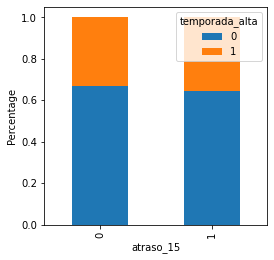

In [216]:
print(pd.crosstab(data["atraso_15"],data["temporada_alta"]))
temp = pd.crosstab(data["atraso_15"],data["temporada_alta"])
temp.div(temp.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("atraso_15")
plt.ylabel("Percentage")
plt.show()

In [ ]:
#Prueba Chi-Cuadrado

#Para tener una conclusión analítica, se usará la prueba chi-cuadrado.

#Ho: no existe dependencia entre las variables atraso_15 y temporada_alta.
#Ha: existe dependencia entre las variables atraso_15 y temporada_alta.

#Si pvalor < 5% => Se rechaza Ho, al 95% de confianza, existe dependencia entre las variables atraso_15 y temporada_alta.
#Si pvalor > 5% => No se rechaza Ho, al 95% de confianza, no existe dependencia entre las variables atraso_15 y temporada_alta.

#Como el pvalor es menor al 5%, Se rechaza Ho, se puede concluir que al 95% de confianza, existe dependencia entre 
#las variables atraso_15 y temporada_alta, por lo que la variable temporada_alta puede ayudar a predecir los atrasos.

In [217]:
contigencia = pd.crosstab(data['atraso_15'], data['temporada_alta']) 
c, p, dof, expected = chi2_contingency(contigencia) 
print(p)

5.453840889095656e-08


### Tasa de atraso por tipo de vuelo

In [ ]:
#La tasa de atraso es mayor en vuelos internacionales que en nacionales (22.6% vs 15.1%) y superior a la media
#(22.6% vs 18.5% la media)

#Al existir diferencia entre los tipos de vuelos y además entre la media, es posible que la variable TIPOVUELO
#ayude a predecir los atrasos.

In [209]:
100*pd.crosstab(data.atraso_15,data.TIPOVUELO,normalize = 'columns')

TIPOVUELO,I,N
atraso_15,,
0,77.439181,84.942921
1,22.560819,15.057079


In [ ]:
#A continuación se detalla un mayor análisis para determinar si existe o no existe dependencia entre las variables.

In [ ]:
#Se inicia con un gráfico de barras al 100% apilado.
#Se puede apreciar que la proporción de vuelos internacionales aumentan cuando es un vuelo con atraso
#que cuando no lo es, es decir aparentemente los vuelos internacionales tienen una mayor probabilidad de tener atraso
#que los vuelos nacionales.

TIPOVUELO      I      N
atraso_15              
0          24192  31400
1           7048   5566


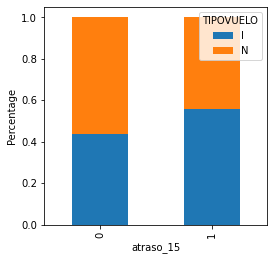

In [218]:
print(pd.crosstab(data["atraso_15"],data["TIPOVUELO"]))
temp = pd.crosstab(data["atraso_15"],data["TIPOVUELO"])
temp.div(temp.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("atraso_15")
plt.ylabel("Percentage")
plt.show()

In [ ]:
#Prueba Chi-Cuadrado

#Para tener una conclusión analítica, se usará la prueba chi-cuadrado.

#Ho: no existe dependencia entre las variables atraso_15 y TIPOVUELO.
#Ha: existe dependencia entre las variables atraso_15 y TIPOVUELO.

#Si pvalor < 5% => Se rechaza Ho, al 95% de confianza, existe dependencia entre las variables atraso_15 y TIPOVUELO.
#Si pvalor > 5% => No se rechaza Ho, al 95% de confianza, no existe dependencia entre las variables atraso_15 y TIPOVUELO.

#Como el pvalor es menor al 5%, Se rechaza Ho, se puede concluir que al 95% de confianza, existe dependencia entre 
#las variables atraso_15 y TIPOVUELO, por lo que la variable TIPOVUELO puede ayudar a predecir los atrasos.

In [219]:
contigencia = pd.crosstab(data['atraso_15'], data['TIPOVUELO']) 
c, p, dof, expected = chi2_contingency(contigencia) 
print(p)

1.8798465447629107e-139


### Conclusión

Las variables que se esperaría puedan influir en predecir los atraso son: temporada_alta y TIPOVUELO

### b. Generación de nuevas variables

### periodo_minutonum (en base a Fecha-I)
Es el minuto durante la hora, desde 0 a 59

In [222]:
data['periodo_minutonum'] = data['Fecha-I'].dt.minute
data['periodo_minutonum'].value_counts()

0     7853
30    6927
45    5137
10    5124
15    4932
20    4769
40    4583
50    4348
25    4286
35    4245
55    3768
5     3328
16     516
14     383
12     376
53     375
41     322
2      319
33     304
36     290
27     279
32     263
4      243
21     227
51     212
42     198
7      197
17     190
37     177
31     174
18     170
8      169
23     166
24     164
49     159
52     157
26     155
59     148
38     148
39     146
34     145
22     143
47     142
58     131
9      129
56     128
11     127
13     125
6      124
28     122
57     115
48     114
1      109
3      106
54     102
29     100
44      96
43      85
46      77
19      59
Name: periodo_minutonum, dtype: int64

In [ ]:
#A continuación se detalla un mayor análisis para determinar si existe o no existe dependencia entre las variables.

In [ ]:
#La mediana de los minutos de la hora de vuelo es similar en los vuelos con atraso (1) y sin atraso (0). 

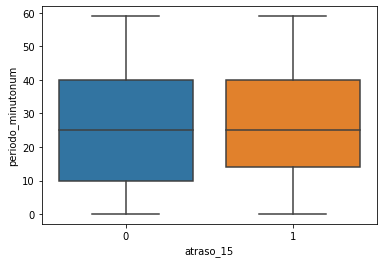

In [261]:
sns.boxplot(x='atraso_15',y='periodo_minutonum',data=data)
plt.show()

### periodo_horanum (en base a Fecha-I)
Es la hora durante el día, desde 0 a 23

In [226]:
data['periodo_horanum'] = data['Fecha-I'].dt.hour
data['periodo_horanum'].value_counts()

7     4882
8     4363
6     4199
18    4162
15    3884
14    3836
13    3675
11    3668
19    3591
17    3465
12    3412
9     3264
16    3072
20    2935
5     2514
10    2462
22    2320
21    2312
1     1573
23    1297
4     1092
0     1082
2      641
3      505
Name: periodo_horanum, dtype: int64

In [ ]:
#A continuación se detalla un mayor análisis para determinar si existe o no existe dependencia entre las variables.

In [ ]:
#La mediana de la hora de vuelo es mayor en los vuelos con atraso (1) frente a los vuelos sin atraso (0).
#Es decir, aparentemente a mayor hora programada del vuelo, mayor probabilidad de tener atraso.

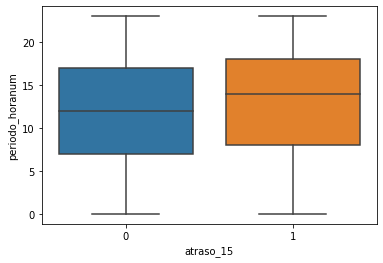

In [262]:
sns.boxplot(x='atraso_15',y='periodo_horanum',data=data)
plt.show()

### periodo_dianum (en base a Fecha-I)
Es el número del día durante el mes, desde 1 a 31

In [240]:
data['periodo_dianum'] = data['Fecha-I'].dt.day
data['periodo_dianum'].value_counts()

20    2301
12    2290
10    2289
27    2288
6     2278
13    2274
3     2272
22    2268
23    2266
16    2264
26    2262
21    2258
7     2256
15    2243
5     2242
19    2238
24    2237
17    2232
28    2232
11    2229
2     2224
9     2222
8     2217
14    2215
4     2215
1     2209
25    2174
18    2156
29    2046
30    2017
31    1292
Name: periodo_dianum, dtype: int64

In [ ]:
#A continuación se detalla un mayor análisis para determinar si existe o no existe dependencia entre las variables.

In [ ]:
#Ligeramente, se aprecia que la mediana del día de vuelo es menor en los vuelos con atraso (1) que en los vuelos sin atraso (0).
#Es decir, aparentemente a menor día durante el mes programada del vuelo, mayor probabilidad de tener atraso.
#Días después de la quincena tienen menor probabilidad de tener vuelos con atraso.

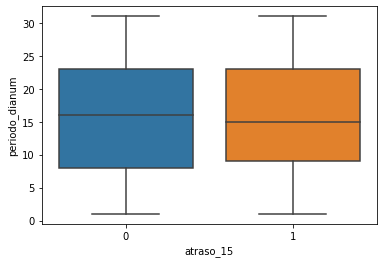

In [263]:
sns.boxplot(x='atraso_15',y='periodo_dianum',data=data)
plt.show()

### periodo_mesnum (en base a Fecha-I)
Es el mes durante el año, desde 1 a 12

In [233]:
data['periodo_mesnum'] = data['Fecha-I'].dt.month
data['periodo_mesnum'].value_counts()

12    6357
1     6108
11    6081
10    6032
7     5991
8     5744
9     5610
2     5561
3     5480
5     5239
4     5021
6     4982
Name: periodo_mesnum, dtype: int64

In [ ]:
#A continuación se detalla un mayor análisis para determinar si existe o no existe dependencia entre las variables.

In [ ]:
#La mediana del mes de vuelo es similar en los vuelos con atraso (1) y sin atraso (0). 

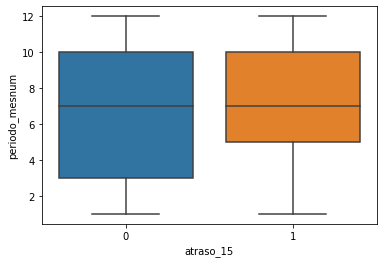

In [264]:
sns.boxplot(x='atraso_15',y='periodo_mesnum',data=data)
plt.show()

### periodo_semananum (en base a Fecha-I)
Es el número de la semana durante el año, desde 1 a 52

In [236]:
data['periodo_semananum'] = data['Fecha-I'].dt.week
data['periodo_semananum'].value_counts()

<ipython-input-236-e4cc57d50824>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['periodo_semananum'] = data['Fecha-I'].dt.week


52    1582
50    1470
51    1451
47    1448
48    1440
45    1429
49    1426
5     1410
4     1409
6     1403
7     1395
3     1391
29    1386
42    1383
46    1382
8     1381
2     1379
43    1374
41    1369
28    1362
44    1360
27    1356
30    1355
1     1354
39    1343
40    1331
37    1320
31    1319
36    1311
9     1304
32    1304
34    1296
35    1291
38    1289
33    1277
10    1244
11    1221
12    1214
26    1204
20    1198
13    1190
14    1189
19    1185
15    1185
18    1184
17    1180
21    1171
24    1161
22    1160
23    1156
16    1151
25    1133
Name: periodo_semananum, dtype: int64

In [ ]:
#A continuación se detalla un mayor análisis para determinar si existe o no existe dependencia entre las variables.

In [ ]:
#La mediana de la semana del año programda del vuelo es mayor en los vuelos con atraso (1) que en los vuelos sin atraso (0).
#Es decir, aparentemente a mayor semana programada del vuelo, mayor probabilidad de tener atraso.

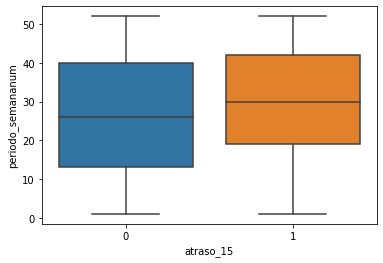

In [265]:
sns.boxplot(x='atraso_15',y='periodo_semananum',data=data)
plt.show()

### periodo_dianom (en base a Fecha-I)
Es el día de la semana, donde Lunes=0 y Domingo=6

In [243]:
data['periodo_dianom'] = data['Fecha-I'].dt.weekday
data['periodo_dianom'].value_counts()

4    10332
3    10245
0    10098
6     9833
2     9726
1     9666
5     8306
Name: periodo_dianom, dtype: int64

In [ ]:
#A continuación se detalla un mayor análisis para determinar si existe o no existe dependencia entre las variables.

In [ ]:
#La tasa de atraso es mayor los viernes (22.3% vs 18.5% la media) y es menor los sábados (15.9% vs 18.5% la media).

#Al existir diferencia entre los días de vuelos y además entre la media, es posible que la variable periodo_dianom
#ayude a predecir los atrasos.

In [267]:
100*pd.crosstab(data.atraso_15,data.periodo_dianom,normalize = 'columns')

periodo_dianom,0,1,2,3,4,5,6
atraso_15,,,,,,,
0,79.887106,83.054004,82.829529,80.087848,77.651955,84.023597,83.738432
1,20.112894,16.945996,17.170471,19.912152,22.348045,15.976403,16.261568


In [ ]:
#Se inicia con un gráfico de barras al 100% apilado.
#Se puede apreciar que la proporción de vuelos programados los días viernes aumentan cuando es un vuelo con atraso
#que cuando no lo es, es decir aparentemente los vuelos programados los días viernes tienen una mayor probabilidad 
#de tener atraso que otros días.

periodo_dianom     0     1     2     3     4     5     6
atraso_15                                               
0               8067  8028  8056  8205  8023  6979  8234
1               2031  1638  1670  2040  2309  1327  1599


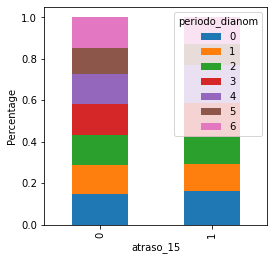

In [268]:
print(pd.crosstab(data["atraso_15"],data["periodo_dianom"]))
temp = pd.crosstab(data["atraso_15"],data["periodo_dianom"])
temp.div(temp.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("atraso_15")
plt.ylabel("Percentage")
plt.show()

In [ ]:
#Prueba Chi-Cuadrado

#Para tener una conclusión analítica, se usará la prueba chi-cuadrado.

#Ho: no existe dependencia entre las variables atraso_15 y periodo_dianom.
#Ha: existe dependencia entre las variables atraso_15 y periodo_dianom.

#Si pvalor < 5% => Se rechaza Ho, al 95% de confianza, existe dependencia entre las variables atraso_15 y periodo_dianom.
#Si pvalor > 5% => No se rechaza Ho, al 95% de confianza, no existe dependencia entre las variables atraso_15 y periodo_dianom.

#Como el pvalor es menor al 5%, Se rechaza Ho, se puede concluir que al 95% de confianza, existe dependencia entre 
#las variables atraso_15 y periodo_dianom, por lo que la variable periodo_dianom puede ayudar a predecir los atrasos.

In [269]:
contigencia = pd.crosstab(data['atraso_15'], data['periodo_dianom']) 
c, p, dof, expected = chi2_contingency(contigencia) 
print(p)

3.116653173519169e-46


### periodo_dianomagrupado (en base a Fecha-I y periodo_dianom)
Es el día de la semana agrupado, donde (Lunes a Viernes)=1 y (Sábado y Domingo)=2

In [246]:
data['periodo_dianomagrupado'] = np.where((data['periodo_dianom'] == 5) | (data['periodo_dianom'] == 6) , 2, 1)
data['periodo_dianomagrupado'].value_counts()

1    50067
2    18139
Name: periodo_dianomagrupado, dtype: int64

In [ ]:
#A continuación se detalla un mayor análisis para determinar si existe o no existe dependencia entre las variables.

In [ ]:
#La tasa de atraso es mayor en la semana (19.4% vs 18.5% la media) y es menor los fines de semana (16.1% vs 18.5% la media).

#Al existir diferencia entre los días de vuelos y además entre la media, es posible que la variable periodo_dianomagrupado
#ayude a predecir los atrasos.

In [270]:
100*pd.crosstab(data.atraso_15,data.periodo_dianomagrupado,normalize = 'columns')

periodo_dianomagrupado,1,2
atraso_15,,
0,80.649929,83.869012
1,19.350071,16.130988


In [ ]:
#Se inicia con un gráfico de barras al 100% apilado.
#Se puede apreciar que la proporción de vuelos programados los días de semana aumentan cuando es un vuelo con atraso
#que cuando no lo es, es decir aparentemente los vuelos programados los días de semana tienen una mayor probabilidad 
#de tener atraso que los fines de semana.

periodo_dianomagrupado      1      2
atraso_15                           
0                       40379  15213
1                        9688   2926


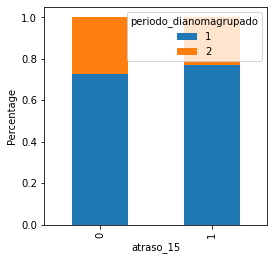

In [271]:
print(pd.crosstab(data["atraso_15"],data["periodo_dianomagrupado"]))
temp = pd.crosstab(data["atraso_15"],data["periodo_dianomagrupado"])
temp.div(temp.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("atraso_15")
plt.ylabel("Percentage")
plt.show()

In [ ]:
#Prueba Chi-Cuadrado

#Para tener una conclusión analítica, se usará la prueba chi-cuadrado.

#Ho: no existe dependencia entre las variables atraso_15 y periodo_dianomagrupado.
#Ha: existe dependencia entre las variables atraso_15 y periodo_dianomagrupado.

#Si pvalor < 5% => Se rechaza Ho, al 95% de confianza, existe dependencia entre las variables atraso_15 y periodo_dianomagrupado.
#Si pvalor > 5% => No se rechaza Ho, al 95% de confianza, no existe dependencia entre las variables atraso_15 y periodo_dianomagrupado.

#Como el pvalor es menor al 5%, Se rechaza Ho, se puede concluir que al 95% de confianza, existe dependencia entre 
#las variables atraso_15 y periodo_dianomagrupado, por lo que la variable periodo_dianomagrupado puede ayudar a predecir los atrasos.

In [272]:
contigencia = pd.crosstab(data['atraso_15'], data['periodo_dianomagrupado']) 
c, p, dof, expected = chi2_contingency(contigencia) 
print(p)

1.2213038039654883e-21


### Des-I_descrip (en base a Des-I)
La variable hace referencia al nombre de la ciudad de destino en base a Des-I.
Para la creación de esta variable se usó la relación entre las variables Des-O y SIGLADES.
Para los valores de la variable Des-I que no se identificaron, como SARI y SEQU, se usó el enlace
https://es.wikipedia.org/wiki/Anexo:Destinos_de_LATAM_Airlines_Group
para completar la información.

In [249]:
data['Des-I_descrip'] = data['Des-I'] 
aux = {'CYYZ' : 'Toronto',
        'EGLL' : 'Londres',
        'EGYP' : 'Puerto Stanley',
        'KATL' : 'Atlanta',
        'KDFW' : 'Dallas',
        'KIAH' : 'Houston',
        'KJFK' : 'Nueva York',
        'KLAX' : 'Los Angeles',
        'KMCO' : 'Orlando',
        'KMIA' : 'Miami',
        'LEMD' : 'Madrid',
        'LFPG' : 'Paris',
        'LIRF' : 'Roma',
        'MDPC' : 'Punta Cana',
        'MMMX' : 'Ciudad de Mexico',
        'MMUN' : 'Cancun',
        'MPTO' : 'Ciudad de Panama',
        'NZAA' : 'Auckland N.Z.',
        'SAAR' : 'Rosario',
        'SABE' : 'Buenos Aires',
        'SACO' : 'Cordoba',
        'SAEZ' : 'Buenos Aires',
        'SAME' : 'Mendoza',
        'SANT' : 'Tucuman',
        'SANU' : 'San Juan, Arg.',
        'SARI' : 'Arica',
        'SAWH' : 'Ushuia',
        'SAZN' : 'Neuquen',
        'SAZS' : 'Bariloche',
        'SBCT' : 'Curitiba, Bra.',
        'SBFI' : 'Cataratas Iguacu',
        'SBFL' : 'Florianapolis',
        'SBGL' : 'Rio de Janeiro',
        'SBGR' : 'Sao Paulo',
        'SCAR' : 'Arica',
        'SCAT' : 'Copiapo',
        'SCBA' : 'Balmaceda',
        'SCCF' : 'Calama',
        'SCCI' : 'Punta Arenas',
        'SCDA' : 'Iquique',
        'SCFA' : 'Antofagasta',
        'SCIE' : 'Concepcion',
        'SCIP' : 'Isla de Pascua',
        'SCJO' : 'Osorno',
        'SCNT' : 'Puerto Natales',
        'SCPQ' : 'Castro (Chiloe)',
        'SCQP' : 'Temuco',
        'SCSE' : 'La Serena',
        'SCTE' : 'Puerto Montt',
        'SCVD' : 'Valdivia',
        'SEGU' : 'Guayaquil',
        'SEQM' : 'Quito',
        'SEQU' : 'Quito',
        'SGAS' : 'Asuncion',
        'SKBO' : 'Bogota',
        'SLCB' : 'Cochabamba',
        'SLLP' : 'La Paz',
        'SLVR' : 'Santa Cruz',
        'SPJC' : 'Lima',
        'SPSO' : 'Pisco, Peru',
        'SULS' : 'Punta del Este',
        'SUMU' : 'Montevideo',
        'YMML' : 'Melbourne',
        'YSSY' : 'Sydney'
}
data = data.replace({"Des-I_descrip": aux})
data['Des-I_descrip'].value_counts()

Buenos Aires        6334
Antofagasta         5787
Lima                5270
Calama              5145
Puerto Montt        4357
                    ... 
Bariloche              2
Puerto Stanley         1
Pisco, Peru            1
Cochabamba             1
Cataratas Iguacu       1
Name: Des-I_descrip, Length: 61, dtype: int64

In [ ]:
#A continuación se detalla un mayor análisis para determinar si existe o no existe dependencia entre las variables.

In [ ]:
#Se puede apreciar que existe diferencia en la tasa de atraso de los vuelos según los diferentes destinos.

#El destino a Atlanta tiene la menor tasa de atraso (5.9% vs 18.5% la media).
#El destino a Ushuia tiene la mayor tasa de atraso, es el triple que la media (66.7% vs 18.5% la media).

#Al existir diferencia entre los destinos y además entre la media, es posible que la variable Des-I_descrip
#ayude a predecir los atrasos.

In [277]:
100*pd.crosstab(data['Des-I_descrip'],data.atraso_15,normalize = 'index')

atraso_15,0,1
Des-I_descrip,,
Antofagasta,85.363746,14.636254
Arica,86.458761,13.541239
Asuncion,71.551724,28.448276
Atlanta,94.134078,5.865922
Auckland N.Z.,62.603878,37.396122
...,...,...
Temuco,84.475416,15.524584
Toronto,68.551237,31.448763
Tucuman,73.684211,26.315789


### Des-I_agrupado (en base a Des-I y Des-I_descrip)
La variable hace referencia el pais de destino en base a Des-I_descrip.

In [251]:
data['Des-I_agrupado'] = data['Des-I'] 
aux = {'CYYZ' : 'Canadá',
        'EGLL' : 'Inglaterra',
        'EGYP' : 'Argentina',
        'KATL' : 'Estados Unidos',
        'KDFW' : 'Estados Unidos',
        'KIAH' : 'Estados Unidos',
        'KJFK' : 'Estados Unidos',
        'KLAX' : 'Estados Unidos',
        'KMCO' : 'Estados Unidos',
        'KMIA' : 'Estados Unidos',
        'LEMD' : 'España',
        'LFPG' : 'Francia',
        'LIRF' : 'Italia',
        'MDPC' : 'República Dominicana',
        'MMMX' : 'México',
        'MMUN' : 'México',
        'MPTO' : 'Panamá',
        'NZAA' : 'Nueva Zelanda',
        'SAAR' : 'Argentina',
        'SABE' : 'Argentina',
        'SACO' : 'Argentina',
        'SAEZ' : 'Argentina',
        'SAME' : 'Argentina',
        'SANT' : 'Argentina',
        'SANU' : 'Argentina',
        'SARI' : 'Chile',
        'SAWH' : 'Argentina',
        'SAZN' : 'Argentina',
        'SAZS' : 'Argentina',
        'SBCT' : 'Brasil',
        'SBFI' : 'Brasil',
        'SBFL' : 'Brasil',
        'SBGL' : 'Brasil',
        'SBGR' : 'Brasil',
        'SCAR' : 'Chile',
        'SCAT' : 'Chile',
        'SCBA' : 'Chile',
        'SCCF' : 'Chile',
        'SCCI' : 'Chile',
        'SCDA' : 'Chile',
        'SCFA' : 'Chile',
        'SCIE' : 'Chile',
        'SCIP' : 'Chile',
        'SCJO' : 'Chile',
        'SCNT' : 'Chile',
        'SCPQ' : 'Chile',
        'SCQP' : 'Chile',
        'SCSE' : 'Chile',
        'SCTE' : 'Chile',
        'SCVD' : 'Chile',
        'SEGU' : 'Ecuador',
        'SEQM' : 'Ecuador',
        'SEQU' : 'Ecuador',
        'SGAS' : 'Paraguay',
        'SKBO' : 'Colombia',
        'SLCB' : 'Bolivia',
        'SLLP' : 'Bolivia',
        'SLVR' : 'Bolivia',
        'SPJC' : 'Perú',
        'SPSO' : 'Perú',
        'SULS' : 'Uruguay',
        'SUMU' : 'Uruguay',
        'YMML' : 'Australia',
        'YSSY' : 'Australia'
}
data = data.replace({"Des-I_agrupado": aux})
data['Des-I_agrupado'].value_counts()

Chile                   36967
Argentina                9237
Perú                     5271
Brasil                   5170
Estados Unidos           2637
Panamá                   1850
Colombia                 1604
Uruguay                  1072
España                    894
México                    763
Ecuador                   425
Nueva Zelanda             361
Francia                   359
Bolivia                   330
Canadá                    283
Italia                    259
Australia                 233
Paraguay                  232
Inglaterra                205
República Dominicana       54
Name: Des-I_agrupado, dtype: int64

In [ ]:
#A continuación se detalla un mayor análisis para determinar si existe o no existe dependencia entre las variables.

In [ ]:
#Se puede apreciar que existe diferencia en la tasa de atraso de los vuelos según los diferentes países de destino.

#El destino a Panamá tiene la menor tasa de atraso (6.3% vs 18.5% la media).
#El destino a Australia tiene la mayor tasa de atraso, es el triple que la media (57.5% vs 18.5% la media).

#Al existir diferencia entre los destinos y además entre la media, es posible que la variable Des-I_agrupado
#ayude a predecir los atrasos.

In [279]:
100*pd.crosstab(data['Des-I_agrupado'],data.atraso_15,normalize = 'index')

atraso_15,0,1
Des-I_agrupado,,
Argentina,73.443759,26.556241
Australia,42.489270,57.510730
Bolivia,80.909091,19.090909
Brasil,74.545455,25.454545
Canadá,68.551237,31.448763
Chile,84.943328,15.056672
Colombia,74.127182,25.872818
Ecuador,80.235294,19.764706
España,80.984340,19.015660


### Emp-I_aerolinea (en base a Emp-I)
La variable hace referencia al nombre de la aerolínea que opera en base a Emp-I. 
Para la creación de esta variable se usó la relación entre las variables Emp-O y OPERA.
Para los valores de la variable Emp-I no se identificó la etiqueta LAW, se usó el enlace
https://es.wikipedia.org/wiki/Latin_American_Wings, la cual permite identificar que 
pertenece a la aerolínea Latin American Wings.

In [253]:
data['Emp-I_aerolinea'] = data['Emp-I'] 
aux = {'AAL' : 'American Airlines',
        'ACA' : 'Air Canada',
        'AFR' : 'Air France',
        'AMX' : 'Aeromexico',
        'ARG' : 'Aerolineas Argentinas',
        'AUT' : 'Austral',
        'AVA' : 'Avianca',
        'AZA' : 'Alitalia',
        'BAW' : 'British Airways',
        'CMP' : 'Copa Air',
        'DAL' : 'Delta Air',
        'DSM' : 'Grupo LATAM',
        'GLO' : 'Gol Trans',
        'IBE' : 'Iberia',
        'JAT' : 'JetSmart SPA',
        'JMR' : 'Latin American Wings',
        'KLM' : 'K.L.M.',
        'LAN' : 'Grupo LATAM',
        'LAP' : 'Grupo LATAM',
        'LAW' : 'Latin American Wings',
        'LNE' : 'Grupo LATAM',
        'LPE' : 'Grupo LATAM',
        'LRC' : 'Lacsa',
        'LXP' : 'Grupo LATAM',
        'ONE' : 'Oceanair Linhas Aereas',
        'PUE' : 'Plus Ultra Lineas Aereas',
        'QFU' : 'Qantas Airways',
        'SKU' : 'Sky Airline',
        'TAM' : 'Grupo LATAM',
        'UAL' : 'United Airlines'
}
data = data.replace({"Emp-I_aerolinea": aux})
data['Emp-I_aerolinea'].value_counts()

Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Air France                    358
Delta Air                     358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: Emp-I_aerolinea, dtype: int64

In [ ]:
#A continuación se detalla un mayor análisis para determinar si existe o no existe dependencia entre las variables.

In [ ]:
#Se puede apreciar que existe diferencia en la tasa de atraso de los vuelos según los diferentes aerolíneas.

#La aerolínea Aeromexico tiene la menor tasa de atraso (2.8% vs 18.5% la media).
#La aerolínea Plus Ultra Lineas Aereas tiene la mayor tasa de atraso, es el triple que la media (61.2% vs 18.5% la media).

#Grupo LATAM está casi cerca a la media (17.9% vs 18.5% la media).

#Al existir diferencia entre las aerolineas y además entre la media, es posible que la variable Emp-I_aerolinea
#ayude a predecir los atrasos.

In [280]:
100*pd.crosstab(data['Emp-I_aerolinea'],data.atraso_15,normalize = 'index')

atraso_15,0,1
Emp-I_aerolinea,,
Aerolineas Argentinas,75.987686,24.012314
Aeromexico,97.150997,2.849003
Air Canada,54.336283,45.663717
Air France,91.620112,8.379888
Alitalia,88.803089,11.196911
American Airlines,93.262880,6.737120
Austral,79.729730,20.270270
Avianca,73.437500,26.562500
British Airways,85.853659,14.146341


### Emp-I_aerolinea_nacionalidad (en base a Emp-I y Emp-I_aerolinea)
La variable hace referencia el pais de la aerolínea en base a Emp-I_aerolinea.
Se usó el siguiente enlace https://es.wikipedia.org/wiki/Anexo:C%C3%B3digos_OACI_de_aerol%C3%ADneas.

In [255]:
data['Emp-I_aerolinea_nacionalidad'] = data['Emp-I'] 
aux = {'AAL' : 'Estados Unidos',
        'ACA' : 'Canadá',
        'AFR' : 'Francia',
        'AMX' : 'México',
        'ARG' : 'Argentina',
        'AUT' : 'Argentina',
        'AVA' : 'Colombia',
        'AZA' : 'Italia',
        'BAW' : 'Reino Unido',
        'CMP' : 'Panamá',
        'DAL' : 'Estados Unidos',
        'DSM' : 'Chile',
        'GLO' : 'Brasil',
        'IBE' : 'España',
        'JAT' : 'Estados Unidos',
        'JMR' : 'Chile',
        'KLM' : 'Países Bajos',
        'LAN' : 'Chile',
        'LAP' : 'Chile',
        'LAW' : 'Chile',
        'LNE' : 'Chile',
        'LPE' : 'Chile',
        'LRC' : 'Costa Rica',
        'LXP' : 'Chile',
        'ONE' : 'Brasil',
        'PUE' : 'España',
        'QFU' : 'Australia',
        'SKU' : 'Chile',
        'TAM' : 'Chile',
        'UAL' : 'Estados Unidos'
}
data = data.replace({"Emp-I_aerolinea_nacionalidad": aux})
data['Emp-I_aerolinea_nacionalidad'].value_counts()

Chile             56864
Estados Unidos     2545
Argentina          2023
Panamá             1850
Colombia           1152
Brasil             1085
Canadá              565
España              411
Francia             358
México              351
Italia              259
Países Bajos        251
Reino Unido         205
Australia           195
Costa Rica           92
Name: Emp-I_aerolinea_nacionalidad, dtype: int64

In [ ]:
#A continuación se detalla un mayor análisis para determinar si existe o no existe dependencia entre las variables.

In [ ]:
#Se puede apreciar que existe diferencia en la tasa de atraso de los vuelos según los diferentes países de origen de las aerolíneas.

#Las aerolíneas de México tiene la menor tasa de atraso (2.8% vs 18.5% la media).
#Las aerolíneas de Australia tiene la mayor tasa de atraso, es el triple que la media (57.9% vs 18.5% la media).

#Las aerolíneas de Chile son similares a la media (18.5% vs 18.5% la media).

#Al existir diferencia entre los países de origen de las aerolineas y además entre la media, 
#es posible que la variable Emp-I_aerolinea_nacionalidad ayude a predecir los atrasos.

In [281]:
100*pd.crosstab(data['Emp-I_aerolinea_nacionalidad'],data.atraso_15,normalize = 'index')

atraso_15,0,1
Emp-I_aerolinea_nacionalidad,,
Argentina,76.124567,23.875433
Australia,42.051282,57.948718
Brasil,69.585253,30.414747
Canadá,54.336283,45.663717
Chile,81.487409,18.512591
Colombia,73.437500,26.562500
Costa Rica,88.043478,11.956522
España,83.941606,16.058394
Estados Unidos,88.801572,11.198428


### Emp-I_aerolinea_lowcost (en base a Emp-I y Emp-I_aerolinea)
La variable hace referencia a si la aerolínea es lowcost o no en base a Emp-I_aerolinea.
Toma el valor de 1 si es lowcost y 0 si no es lowcost.
Se usó el siguiente enlace https://elmundook.com/guia-de-aerolineas-low-cost/.

In [257]:
data['Emp-I_aerolinea_lowcost'] = np.where((data['Emp-I_aerolinea'] == 'Gol Trans') | 
                                           (data['Emp-I_aerolinea'] == 'JetSmart SPA') |
                                           (data['Emp-I_aerolinea'] == 'Sky Airline'), 1, 0)
data['Emp-I_aerolinea_lowcost'].value_counts()

0    52007
1    16199
Name: Emp-I_aerolinea_lowcost, dtype: int64

In [ ]:
#A continuación se detalla un mayor análisis para determinar si existe o no existe dependencia entre las variables.

In [ ]:
#Se puede apreciar que no existe diferencia en la tasa de atraso de los vuelos según el tipo de aerolínea.

#Al no existir diferencia entre el tipo de aerolinea, 
#es posible que la variable Emp-I_aerolinea_lowcost no ayude a predecir los atrasos.

In [288]:
100*pd.crosstab(data.atraso_15,data['Emp-I_aerolinea_lowcost'],normalize = 'columns')

Emp-I_aerolinea_lowcost,0,1
atraso_15,,
0,81.558252,81.338354
1,18.441748,18.661646


In [ ]:
#Se inicia con un gráfico de barras al 100% apilado.
#Se puede apreciar que la proporción del tipo de vuelos es similar en un vuelo con atraso y sin atraso.

Emp-I_aerolinea_lowcost      0      1
atraso_15                            
0                        42416  13176
1                         9591   3023


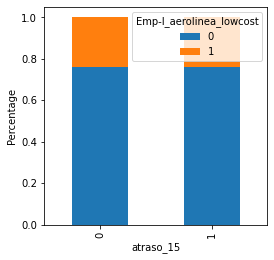

In [289]:
print(pd.crosstab(data["atraso_15"],data["Emp-I_aerolinea_lowcost"]))
temp = pd.crosstab(data["atraso_15"],data["Emp-I_aerolinea_lowcost"])
temp.div(temp.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("atraso_15")
plt.ylabel("Percentage")
plt.show()

In [ ]:
#Prueba Chi-Cuadrado

#Para tener una conclusión analítica, se usará la prueba chi-cuadrado.

#Ho: no existe dependencia entre las variables atraso_15 y Emp-I_aerolinea_lowcost.
#Ha: existe dependencia entre las variables atraso_15 y Emp-I_aerolinea_lowcost.

#Si pvalor < 5% => Se rechaza Ho, al 95% de confianza, existe dependencia entre las variables atraso_15 y Emp-I_aerolinea_lowcost.
#Si pvalor > 5% => No se rechaza Ho, al 95% de confianza, no existe dependencia entre las variables atraso_15 y Emp-I_aerolinea_lowcost.

#Como el pvalor es mayor al 5%, No se rechaza Ho, se puede concluir que al 95% de confianza, no existe dependencia entre 
#las variables atraso_15 y Emp-I_aerolinea_lowcost, por lo que la variable Emp-I_aerolinea_lowcost 
#posiblemente no ayudará a predecir los atrasos.

In [291]:
contigencia = pd.crosstab(data['atraso_15'], data['Emp-I_aerolinea_lowcost']) 
c, p, dof, expected = chi2_contingency(contigencia) 
print(p)

0.5366537764487993


### periodo_dia (en base a Fecha-I)

In [ ]:
#Se puede apreciar que existe diferencia en la tasa de atraso de los vuelos según el momento del día.

#Los vuelos programados durante la mañana tienen la menor tasa de atraso (16.0% vs 18.5% la media).
#Los vuelos programados durante la noche tiene la mayor tasa de atraso (20.0% vs 18.5% la media).

#Al existir diferencia entre los momentos del día en los que son programados los vuelos y además entre la media, 
#es posible que la variable periodo_dia ayude a predecir los atrasos.

In [294]:
100*pd.crosstab(data.atraso_15,data.periodo_dia,normalize = 'columns')

periodo_dia,mañana,noche,tarde
atraso_15,,,
0,83.993373,79.997694,80.059594
1,16.006627,20.002306,19.940406


In [ ]:
#Se inicia con un gráfico de barras al 100% apilado.
#Se puede apreciar que la proporción de vuelos programados durante la tarde y noche aumentan cuando es un vuelo con atraso
#que cuando no lo es, es decir aparentemente los vuelos programados la tarde y noche tienen una mayor probabilidad 
#de tener atraso que los vuelos programados durante la mañana.

periodo_dia  mañana  noche  tarde
atraso_15                        
0             21294  13878  20420
1              4058   3470   5086


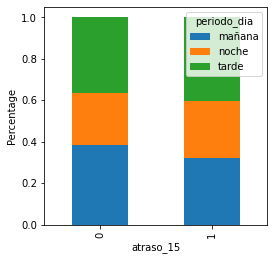

In [295]:
print(pd.crosstab(data["atraso_15"],data["periodo_dia"]))
temp = pd.crosstab(data["atraso_15"],data["periodo_dia"])
temp.div(temp.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("atraso_15")
plt.ylabel("Percentage")
plt.show()

In [ ]:
#Prueba Chi-Cuadrado

#Para tener una conclusión analítica, se usará la prueba chi-cuadrado.

#Ho: no existe dependencia entre las variables atraso_15 y periodo_dia.
#Ha: existe dependencia entre las variables atraso_15 y periodo_dia.

#Si pvalor < 5% => Se rechaza Ho, al 95% de confianza, existe dependencia entre las variables atraso_15 y periodo_dia.
#Si pvalor > 5% => No se rechaza Ho, al 95% de confianza, no existe dependencia entre las variables atraso_15 y periodo_dia.

#Como el pvalor es menor al 5%, Se rechaza Ho, se puede concluir que al 95% de confianza, existe dependencia entre 
#las variables atraso_15 y periodo_dia, por lo que la variable periodo_dia posiblemente ayudará a predecir los atrasos.

In [296]:
contigencia = pd.crosstab(data['atraso_15'], data['periodo_dia']) 
c, p, dof, expected = chi2_contingency(contigencia) 
print(p)

1.0758024973325912e-36


In [258]:
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,periodo_dianum,periodo_mesnum,periodo_semananum,periodo_dianom,periodo_dianomagrupado,Des-I_descrip,Des-I_agrupado,Emp-I_aerolinea,Emp-I_aerolinea_nacionalidad,Emp-I_aerolinea_lowcost
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,1,1,52,6,2,Miami,Estados Unidos,American Airlines,Estados Unidos,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2,1,1,0,1,Miami,Estados Unidos,American Airlines,Estados Unidos,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,3,1,1,1,1,Miami,Estados Unidos,American Airlines,Estados Unidos,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,4,1,1,2,1,Miami,Estados Unidos,American Airlines,Estados Unidos,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,5,1,1,3,1,Miami,Estados Unidos,American Airlines,Estados Unidos,0


### Conclusiones
Las variables que se esperaría puedan influir en predecir los atraso son: 
    periodo_horanum,
    periodo_dianum,
    periodo_semananum,
    periodo_dianom,
    periodo_dianomagrupado,
    Des-I_descrip,
    Des-I_agrupado,
    Emp-I_aerolinea,
    Emp-I_aerolinea_nacionalidad y 
    periodo_dia.

### Conclusión Final
Finalmente, en respuesta a la pregunta 3 y después de analizar la composición de las variables destino, aerolínea, mes del año, día de la semana, temporada y tipo de vuelo en los puntos a y b, las variables que se esperaría puedan influir en predecir los atraso son: destino, aerolinea, día de la semana, temporada y tipo de vuelo.

# Pregunta 1
¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

### Análisis descriptivo de la variable minutos de atraso (dif_min)

La media de la variable minutos de atraso es de 9.11 y la mediana es de 4.00, esto indicar que la distribución de los minutos de atraso de los vuelos es asimétrica, pues la media es mayor a la mediana.

In [362]:
data['dif_min'].describe()

count    68206.000000
mean         9.110855
std         19.313387
min        -14.000000
25%         -1.000000
50%          4.000000
75%         12.000000
max        161.000000
Name: dif_min, dtype: float64

Coeficiente de asimetría

Haciendo uso del coeficiente de asimetría, se tiene que su valor es de 3.5, como es mayor a 0, entonces presenta sesgo positivo, por lo que se espera que la distribución de los minutos de atraso de los vuelos este concentrada a la izquiera.

In [365]:
ss.skew(data['dif_min'])

3.553891267526146

Coeficiente de curtosis

Haciendo uso del coeficiente de curtosis, se tiene que su valor es de 16.8, como es mayor a 0.25, entonces la distribución de los minutos de atraso de los vuelos presenta una distribución platicúrtica.

In [366]:
ss.kurtosis(data['dif_min'])

16.812570822579897

### Visualización de la variable minutos de atraso (dif_min)

Se puede apreciar claramente los hallazgos encontrados haciendo uso de los coeficientes de asimetría y curtosis.

La distribución de los minutos de atraso de los vuelos este concentrada a la izquiera y presenta una distribución platicúrtica, por lo que presenta una distribución asimétrica.

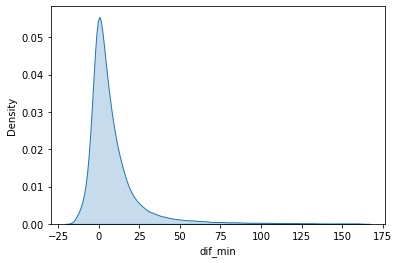

In [361]:
sns.kdeplot(data['dif_min'],shade=True)
plt.show()

### Prueba de normalidad de la variable minutos de atraso (dif_min)

In [ ]:
#Ho: La variable minutos de atraso se aproxima a una distribución normal
#Ha: La variable minutos de atraso no se aproxima a una dsitribución normal

#Si el pvalor < 5% => Se rechaza la Ho, al 95% de confianza, la variable minutos de atraso 
#no se aproxima a una distribución normal
#Si el pvalor > 5% => No se rechaza la Ho, al 95% de confianza, la variable minutos de atraso 
#se aproxima a una distribución normal

Como el pvalor < 5%, Se rechaza la Ho, al 95% de confianza, la distribución de la variable minutos de atraso de los vuelos no se aproxima a una distribución normal.

In [364]:
ss.normaltest(data.dif_min)

NormaltestResult(statistic=51301.007187515446, pvalue=0.0)

Con esta prueba se vuelve a corroborar que la distribución de la variable minutos de atraso de los vuelos no es simétrica.

### Distribución de los minutos de atraso de los vuelos según TIPOVUELO

La distribución de los minutos de atraso de los vuelos nacionales es más platicúrtica que las de loso vuelos internacionales.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:949: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:992: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:949: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:992: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(


Text(0, 0.5, 'Probability Density')

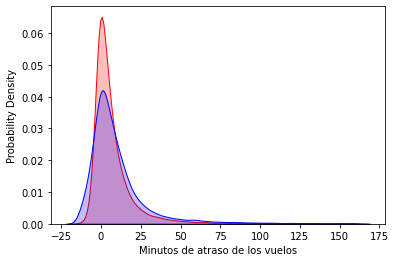

In [371]:
sns.kdeplot(data.loc[(data['TIPOVUELO']=='N'),
            'dif_min'], color='r', shade=True, Label='Vuelo Nacional')
  
sns.kdeplot(data.loc[(data['TIPOVUELO']=='I'), 
            'dif_min'], color='b', shade=True, Label='Vuelo Internacional')
  
plt.xlabel('Minutos de atraso de los vuelos')
plt.ylabel('Probability Density')

### Distribución de los minutos de atraso de los vuelos según temporada_alta

La distribución de los minutos de atraso de los vuelos en temporada alta y baja son similares.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:949: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:992: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:949: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:992: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(


Text(0, 0.5, 'Probability Density')

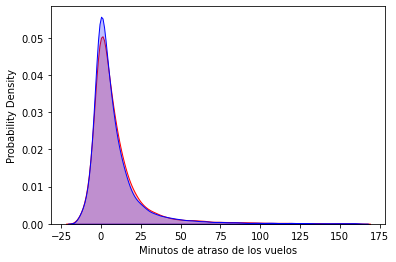

In [374]:
sns.kdeplot(data.loc[(data['temporada_alta']=='1'),
            'dif_min'], color='r', shade=True, Label='Temporada Alta')
  
sns.kdeplot(data.loc[(data['temporada_alta']=='0'), 
            'dif_min'], color='b', shade=True, Label='Temporada Baja')
  
plt.xlabel('Minutos de atraso de los vuelos')
plt.ylabel('Probability Density')

# Pregunta 4
Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.
Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [ ]:
#Algunos puntos que mencionar antes de entrenar el modelo:

#1. Para el entrenamiento del modelo no se usarán las siguientes variables Fecha-O, Vlo-O, Ori-O, Des-O y Emp-O, 
#DIA, MES, AÑO, DIANOM, pues son variables que hacen referencia a la reprogramación del vuelo y 
#al momento de la réplica del modelo no se encontrarán disponibles.

#2. No se usará la variable Ori-I, pues sólo tiene la categoría SCEL, fue una variable de filtro.

#3. No se usará la variable SIGLAORI, pues sólo tiene la categoría Santiago, fue una variable de filtro.

#4. No se usará la variable dif_min, pues sirvió para generar el target atraso_15.

#5. No se usarán las variables periodo_minutonum, periodo_mesnum y Emp-I_aerolinea_lowcost, pues después de
#realizar un análisis bivariado no ayudaron a diferenciar los vuelos con y sin atraso.

#6. Con respecto a las variables tentativas en el modelo son:
#TIPOVUELO => se usará
#temporada_alta => se usará
#periodo_dia => se usará
#periodo_horanum => se usará
#periodo_dianum => se usará
#periodo_semananum => se usará
#periodo_dianom => se usará
#periodo_dianomagrupado => no se usará pues tiene un pvalor mayor a su variable origen periodo_dianom 
#Des-I_descrip => se usará
#Des-I_agrupado => se usará
#Emp-I_aerolinea => se usará
#Emp-I_aerolinea_nacionalidad => se usará

### LabelEncoder
Convierte cada valor en una columna categórica en un valor numérico.

In [310]:
data['c_TIPOVUELO'] = LabelEncoder().fit_transform(data.TIPOVUELO.values)
data['c_temporada_alta'] = LabelEncoder().fit_transform(data.temporada_alta.values)
data['c_periodo_dia'] = LabelEncoder().fit_transform(data.periodo_dia.values)
data['c_periodo_dianom'] = LabelEncoder().fit_transform(data.periodo_dianom.values)
data['c_Des-I_descrip'] = LabelEncoder().fit_transform(data['Des-I_descrip'].values)
data['c_Des-I_agrupado'] = LabelEncoder().fit_transform(data['Des-I_agrupado'].values)
data['c_Emp-I_aerolinea'] = LabelEncoder().fit_transform(data['Emp-I_aerolinea'].values)
data['c_Emp-I_aerolinea_nacionalidad'] = LabelEncoder().fit_transform(data['Emp-I_aerolinea_nacionalidad'].values)

In [311]:
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,Emp-I_aerolinea_nacionalidad,Emp-I_aerolinea_lowcost,c_TIPOVUELO,c_temporada_alta,c_periodo_dia,c_periodo_dianom,c_Des-I_descrip,c_Des-I_agrupado,c_Emp-I_aerolinea,c_Emp-I_aerolinea_nacionalidad
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Estados Unidos,0,0,1,1,6,34,9,5,8
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Estados Unidos,0,0,1,1,0,34,9,5,8
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Estados Unidos,0,0,1,1,1,34,9,5,8
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Estados Unidos,0,0,1,1,2,34,9,5,8
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Estados Unidos,0,0,1,1,3,34,9,5,8


### Creación de la matriz de datos y target

In [312]:
X = data[['c_TIPOVUELO','c_temporada_alta','c_periodo_dia','periodo_horanum','periodo_dianum','periodo_semananum',
          'c_periodo_dianom','c_Des-I_descrip','c_Des-I_agrupado','c_Emp-I_aerolinea','c_Emp-I_aerolinea_nacionalidad']]
y = data['atraso_15']

In [313]:
X = X.to_numpy()
y = y.to_numpy()

### Partición de la muestra en train y test

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Estandarización de variables

In [315]:
X_train_orig = X_train
X_test_orig = X_test

In [316]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

### Entrenamiento de modelos

Se entrenaron 6 modelos de clasificación para estimar la probabilidad de atraso de un vuelo.

Cabe resaltar que el entrenamiento se realizará sin balancear la variables atraso_15, pues está tiene una tasa de atrasos igual a 18.5% y según la bibliografía se recomienda balancear para tasas menores al 5%.

a.Regresión Logística

In [317]:
classifier_reg = LogisticRegression(max_iter = 1e5).fit(X_train, y_train)

b.Naive Bayes

In [318]:
classifier_nb = GaussianNB().fit(X_train, y_train)

c.K-Vecino más cercano

In [ ]:
#Para este modelo se realizará primero el tuneo con validación cruzada igual a 5 para encontrar el K más adecuado.
#Se usará valores de K entre 1 y 15.
#luego se procederá a usar ese valor para entrenar el modelo.

In [322]:
k_range = range(1, 15)
k_scores = []

In [323]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

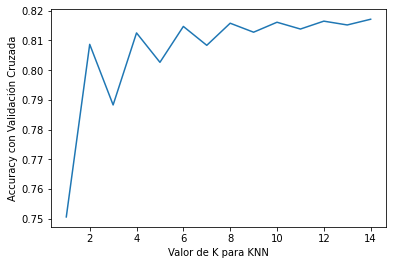

In [324]:
plt.plot(k_range, k_scores)
plt.xlabel('Valor de K para KNN')
plt.ylabel('Accuracy con Validación Cruzada')
plt.show()

In [ ]:
#Según el gráfico el menor valor de K es 3, este se usará para entrenar el modelo.

In [325]:
classifier_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

d.Máquina de Soporte Vectorial

In [ ]:
#Para este modelo se recomienda primero el tuneo con validación cruzada igual a 5 para encontrar los parámetros más adecuados
#C y gamma haciendo uso de un kernel radial rbf
#luego proceder a usar esos valores para entrenar el modelo.

#Sin embargo, por temas de memoria de procesamiento sólo se mostrará las funciones.

In [330]:
#param_grid_svm = {'C': [1,5,10], 'gamma': [2,1.5,1,0.1],'kernel': ['rbf']}

In [332]:
#grid_svm = GridSearchCV(SVC(),param_grid_svm,refit=True,verbose=2,cv=5)
#grid_svm.fit(X_train,y_train)

In [333]:
#print(grid.best_estimator_)

In [335]:
#classifier_svm = SVC(kernel='rbf',probability=True).fit(X_train, y_train)

e.Redes Neuronales Artificiales

In [ ]:
#Para este modelo se recomienda primero el tuneo con validación cruzada igual a 5 para encontrar los parámetros más adecuados
#hidden_layer_sizes, activation, solver, alpha y learning_rate
#luego proceder a usar esos valores para entrenar el modelo.

#Sin embargo, por temas de memoria de procesamiento se usará los valores por defecto y no se tunerá.
#Sólo se mostrará las funciones para el tuneo a continuación:

In [ ]:
#param_grid = {
#    'hidden_layer_sizes': [(10,30,10),(20,)],
#    'activation': ['tanh', 'relu'],
#    'solver': ['sgd', 'adam'],
#    'alpha': [0.0001, 0.05],
#    'learning_rate': ['constant','adaptive'],
#}

In [ ]:
#grid = GridSearchCV(MLPClassifier(max_iter=500),param_grid,refit=True,verbose=2,cv=5)
#grid.fit(X_train,y_train)

In [ ]:
#print(grid.best_estimator_)

In [339]:
classifier_rna = MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(10, 30, 10),
                               max_iter=500).fit(X_train, y_train)

f.Random Forest

In [ ]:
#Para este modelo se recomienda primero el tuneo con validación cruzada igual a 5 para encontrar los parámetros más adecuados
#n_estimators, max_features y max_depth
#luego proceder a usar esos valores para entrenar el modelo.

#Sin embargo, por temas de memoria de procesamiento se usará los valores por defecto y no se tunerá.
#Sólo se mostrará las funciones para el tuneo a continuación:

In [ ]:
#param_grid = {
#    'n_estimators': [200,300,400,500,600,700],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]
#}

In [ ]:
#grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=2,cv=5)
#grid.fit(X_train,y_train)

In [ ]:
#print(grid.best_estimator_)

In [336]:
classifier_rf = RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=500).fit(X_train, y_train)

g.Gradiente de Boosting

In [ ]:
#Para este modelo se recomienda primero el tuneo con validación cruzada igual a 5 para encontrar los parámetros más adecuados
#n_estimators, max_features y max_depth
#luego proceder a usar esos valores para entrenar el modelo.

#Sin embargo, por temas de memoria de procesamiento se usará los valores por defecto y no se tunerá.
#Sólo se mostrará las funciones para el tuneo a continuación:

In [ ]:
#param_grid = {
#    'n_estimators': [200, 700],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]
#}

In [ ]:
#grid = GridSearchCV(GradientBoostingClassifier(),param_grid,refit=True,verbose=2,cv=5)
#grid.fit(X_train,y_train)

In [ ]:
#print(grid.best_estimator_)

In [338]:
classifier_boos = GradientBoostingClassifier(max_depth=2, max_features='log2', n_estimators=500).fit(X_train, y_train)

h.Teniendo en cuenta que no se tendrá problemas de procesamiento, se sugiere también usar los modelos:
LightGM, CatBoost, Deep Learning, Ensamble y AutoML.

### Pregunta 5
Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué
elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la
performance?

### ¿Qué performance tiene?

A continuación se muestra el performance de los 6 modelos entrenados haciendo uso del área bajo la curva AUC.

In [347]:
#Regresión logística
y_pred_prob_reg = classifier_reg.predict_proba(X_test)
false_positive_rate_reg, true_positive_rate_reg, thresholds_reg = roc_curve(y_test, y_pred_prob_reg[:,1])
roc_auc_reg = auc(false_positive_rate_reg, true_positive_rate_reg)
roc_auc_reg

0.6416432085894401

In [348]:
#Naive Bayes
y_pred_prob_nb = classifier_nb.predict_proba(X_test)
false_positive_rate_nb, true_positive_rate_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb[:,1])
roc_auc_nb = auc(false_positive_rate_nb, true_positive_rate_nb)
roc_auc_nb

0.6320917974635154

In [349]:
#K-Vecino más cercano
y_pred_prob_knn = classifier_knn.predict_proba(X_test)
false_positive_rate_knn, true_positive_rate_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn[:,1])
roc_auc_knn = auc(false_positive_rate_knn, true_positive_rate_knn)
roc_auc_knn

0.6474415768846925

In [350]:
#Redes Neuronales Artificiales
y_pred_prob_rna = classifier_rna.predict_proba(X_test)
false_positive_rate_rna, true_positive_rate_rna, thresholds_rna = roc_curve(y_test, y_pred_prob_rna[:,1])
roc_auc_rna = auc(false_positive_rate_rna, true_positive_rate_rna)
roc_auc_rna

0.6858005370289353

In [351]:
#Random Forest
y_pred_prob_rf = classifier_rf.predict_proba(X_test)
false_positive_rate_rf, true_positive_rate_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf[:,1])
roc_auc_rf = auc(false_positive_rate_rf, true_positive_rate_rf)
roc_auc_rf

0.6788740992706118

In [352]:
#Boosting
y_pred_prob_boos = classifier_boos.predict_proba(X_test)
false_positive_rate_boos, true_positive_rate_boos, thresholds_boos = roc_curve(y_test, y_pred_prob_boos[:,1])
roc_auc_boos = auc(false_positive_rate_boos, true_positive_rate_boos)
roc_auc_boos

0.7122497485762517

In [ ]:
#Comparación de modelos

In [356]:
print('Regresión Logística tiene un performace de: ',roc_auc_reg)
print('Naive Bayes tiene un performace de: ', roc_auc_nb)
print('K-Vecino más cercano tiene un performace de: ', roc_auc_knn)
print('Redes Neuronales Artificiales tiene un performace de: ', roc_auc_rna)
print('Random Forest tiene un performace de: ', roc_auc_rf)
print('Boosting tiene un performace de: ', roc_auc_boos)

Regresión Logística tiene un performace de:  0.6416432085894401
Naive Bayes tiene un performace de:  0.6320917974635154
K-Vecino más cercano tiene un performace de:  0.6474415768846925
Redes Neuronales Artificiales tiene un performace de:  0.6858005370289353
Random Forest tiene un performace de:  0.6788740992706118
Boosting tiene un performace de:  0.7122497485762517


### ¿Qué métricas usaste para evaluar esa performance y por qué?

La métrica que usé fue el área bajo la curva AUC, pues combina varias tablas de clasificación y ayuda a discriminar mejor
a los vuelos con y sin atraso. Además, al tener una tasa de atraso del 18.5%, según la bibliografía 
es el indicador más adecuado en estos casos.

### ¿Por qué elegiste ese algoritmo en particular?

Después de usar como indicador de perfomance el área bajo la curva AUC, el modelo más adecuado es el Boosting (classifier_boos),
pues es aquel que tiene mayor valor de área bajo la cruva AUC a comparación de los otros modelos.

### ¿Qué variables son las que más influyen en la predicción?

Las variables que más influyen en la predicción son:

Top1: Semana del año (periodo_semananum)

Top2: Pais de destino (c_Des-I_agrupado)

Top3: Nacionalidad de la aerolínea (c_Emp-I_aerolinea_nacionalidad)

A continuación, se muestra el ranking completo de variables según su importancia.

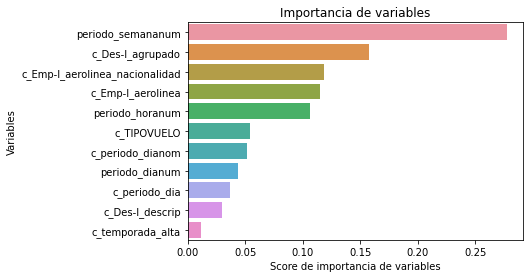

In [345]:
feature_scores_bo = pd.Series(classifier_boos.feature_importances_, index=['c_TIPOVUELO','c_temporada_alta','c_periodo_dia','periodo_horanum',
                                                     'periodo_dianum','periodo_semananum','c_periodo_dianom','c_Des-I_descrip',
                                                     'c_Des-I_agrupado','c_Emp-I_aerolinea','c_Emp-I_aerolinea_nacionalidad']).sort_values(ascending=False)
sns.barplot(x=feature_scores_bo, y=feature_scores_bo.index)
plt.xlabel('Score de importancia de variables')
plt.ylabel('Variables')
plt.title("Importancia de variables")
plt.show()

### ¿Cómo podrías mejorar la performance?

Es posible mejorar el performance haciendo lo siguiente:

1. Balanceando del target atraso_15 para probar los modelos con y sin balancear.
2. Entrenar los modelos LightGM, CatBoost, Deep Learning, Ensamble y AutoML. Compararlos con los ya entrenados.

# MODELO EN PRODUCCIÓN

Se puede exportar el modelo más adecuado para ponerlo en un ambiente de producción.
A partir de ello se puede generar un API para alimentar una aplicación web para poder hacer la predicción de la probabilidad de los vuelos con atrasos.

A continuación se exportará el modelo más adecuado.

In [358]:
import pickle

In [359]:
Pkl_Filename = "D:\Bases\Latam\classifier_boos.pkl"

with open (Pkl_Filename, 'wb') as file:
    pickle.dump(classifier_boos, file)